<a href="https://colab.research.google.com/github/JustAlex5/deep_learning/blob/main/ex10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Deep Learning: Ex.10 - RNN

Submitted by: [... **your name and ID** ...]


In [43]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Input
from tensorflow.keras.layers import SimpleRNN, LSTM # <--- recurrent layers

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt
from seaborn import heatmap
import re

print(tf.__version__)

2.7.0


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
ls '/content/drive/MyDrive/Ex10'

war_and_peace.txt


In [4]:
path='/content/drive/MyDrive/Ex10/war_and_peace.txt'

***
### 1. Preprocess the text corpus

(if you are using google colab, remember to upload the corpus file first..)

In [59]:
f = open(path,'r') # open the corpus file

text = f.read().lower()  # read file and convert to lower-case letters
# text= text.replace('\n', ' ')
text = re.sub(r'[^a-zA-Z0-9 ]',r'',text)

print('len(text) = ',len(text))


print(text[:400]) # print the first 400 characters..

len(text) =  3021421
well prince so genoa and lucca are now just family estates of thebuonapartes but i warn you if you dont tell me that this means warif you still try to defend the infamies and horrors perpetrated by thatantichristi really believe he is antichristi will have nothing moreto do with you and you are no longer my friend no longer my faithfulslave as you call yourself but how do you do i see i have frigh


- generate training sequences of `T=20` characters, by sampling the text corpus with a stride of 5 characters (i.e., each sequences starts 5 chars after the begining of the last sequences).

- generate a matching list, holding the `next_char` for each of your sequences.

- how many sequences did you extract in total? `N = ?`

- convert the sequences into a 1-hot representation, suitable for our model trainig:

`X.shape = (N, T, len(chars))`

`Y.shape = (N, len(chars))`

In [45]:
chars = sorted(list(set(text)))
text_size, vocab_size = len(text), len(chars)
print('There are %d total characters and %d unique characters in your data.' % (text_size, vocab_size))
print('chars = ',chars)

There are 3083435 total characters and 37 unique characters in your data.
chars =  [' ', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']


In [63]:
char_to_ix = { ch:i for i,ch in enumerate(chars) }
ix_to_char = { i:ch for i,ch in enumerate(chars) }

ix_to_char

{0: ' ',
 1: '0',
 2: '1',
 3: '2',
 4: '3',
 5: '4',
 6: '5',
 7: '6',
 8: '7',
 9: '8',
 10: '9',
 11: 'a',
 12: 'b',
 13: 'c',
 14: 'd',
 15: 'e',
 16: 'f',
 17: 'g',
 18: 'h',
 19: 'i',
 20: 'j',
 21: 'k',
 22: 'l',
 23: 'm',
 24: 'n',
 25: 'o',
 26: 'p',
 27: 'q',
 28: 'r',
 29: 's',
 30: 't',
 31: 'u',
 32: 'v',
 33: 'w',
 34: 'x',
 35: 'y',
 36: 'z'}

In [60]:
    ###########################
    ###  your code here...  ###
    ###########################

T = 20  # extract training sequences of length T
stride = 5

sequences = []  # This holds our extracted sequences
next_chars = []  # This holds the targets (the follow-up character)

for i in range(0, len(text) - T, stride):
  sequences.append(text[i: i + T])
  next_chars.append(text[i + T])


In [48]:
len(sequences)

616683

In [61]:
for i in range(10):
    print(sequences[i], '->', next_chars[i])

well prince so genoa ->  
prince so genoa and  -> l
e so genoa and lucca ->  
genoa and lucca are  -> n
 and lucca are now j -> u
lucca are now just f -> a
 are now just family ->  
now just family esta -> t
ust family estates o -> f
amily estates of the -> b


In [62]:
X = np.zeros((len(sequences), T, len(chars)), dtype='bool')
Y = np.zeros((len(sequences), len(chars)), dtype='bool')

for i, seq in enumerate(sequences):
    for t, char in enumerate(seq):
        X[i, t, char_to_ix[char]] = 1
    Y[i, char_to_ix[next_chars[i]]] = 1
    
print('X.shape = (#examples, T, input-dim) =', X.shape)
print('Y.shape = (#examples, output-dim) =', Y.shape)

X.shape = (#examples, T, input-dim) = (604281, 20, 37)
Y.shape = (#examples, output-dim) = (604281, 37)


*** **bold text**
### 2. LTSM Model

- Build an `LTSM` model with 128 (hidden)-units that accepts the input sequences. Add a `Dense` layer on top of it, with `len(chars)` softmax units.

- Train the model for only 1 epoch (use: `RMSprop` and batch size of 128).



In [51]:
    ###########################
    ###  your code here...  ###
    ###########################

model = Sequential()
model.add(Input(shape=(T, len(chars))))  # (12,27)
model.add(LSTM (128)) # 32 internal state units
model.add(Dense(len(chars), activation="softmax"))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 128)               84992     
                                                                 
 dense_1 (Dense)             (None, 37)                4773      
                                                                 
Total params: 89,765
Trainable params: 89,765
Non-trainable params: 0
_________________________________________________________________


In [52]:
model.compile(loss='categorical_crossentropy', optimizer='rmsprop')

history = model.fit(X, Y, epochs=1, batch_size=128)

4818/4818 [==============================] - 29s 6ms/step - loss: 2.0186


### 3. Model predictions


- use the senternce `the meaning of life ` as an input to the model (convert it to 1-hot first..),

- plot the model's output as a probability distribution over the list of chars.

- sample a single char from that distribution, and add it to the generated sentence.

- update the 1-hot buffer, and continue the process for 99 more letters (using a loop).

- print the resulting sentence.

In [53]:
sentence='the meaning of life'
one_hot_sentence = np.zeros((len(sentence), T, len(chars)), dtype='bool')

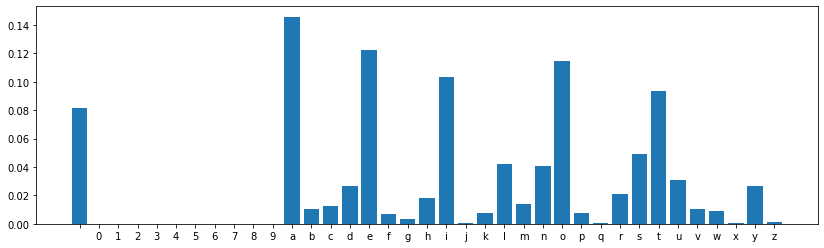

In [54]:
    ###########################
    ###  your code here...  ###
    ###########################
yhat=model.predict(one_hot_sentence)
plt.figure(figsize=(14,4))
plt.bar(range(len(chars)), yhat[0])
plt.xticks(range(len(chars)), labels=chars)
plt.show()

In [55]:
input_buffer = one_hot_sentence[0]
generated_text = sentence

yy = []

for i in range(100):
    yhat = model.predict(input_buffer[None,:])

    # sample the next character:
    # ix = np.argmax(yhat)
    ix = np.random.choice(range(len(chars)), p=yhat[0])

    ch = ix_to_char[ix]
    generated_text += ch

    # update the input buffer:
    input_buffer = np.r_[input_buffer[1:,:], np.zeros((1,len(chars)))]
    input_buffer[-1,ix] = 1

    yy.append(yhat)

print(generated_text)

the meaning of lifety he sauk of michuming so stokntity this shighted to whole he meger torzerthing the nontesscas and 


***
### 3. Fit your model

- Fit your model a bit more (try 10-20 epochs), and regenerate a new `N=100` sentence sample. Does it get any better?

- If you wish, you can try to train the model further, or you can try using a different corpus (dataset) for the training (you can even try a text in hebrew). Be creative ;)

In [56]:
    ###########################
    ###  your code here...  ###
    ###########################
model.compile(loss='categorical_crossentropy', optimizer='rmsprop')

history_20 = model.fit(X, Y, epochs=20, batch_size=128)

Epoch 1/20
4818/4818 [==============================] - 30s 6ms/step - loss: 1.6424
Epoch 2/20
4818/4818 [==============================] - 26s 5ms/step - loss: 1.5137
Epoch 3/20
4818/4818 [==============================] - 26s 5ms/step - loss: 1.4423
Epoch 4/20
4818/4818 [==============================] - 26s 5ms/step - loss: 1.3957
Epoch 5/20
4818/4818 [==============================] - 26s 5ms/step - loss: 1.3618
Epoch 6/20
4818/4818 [==============================] - 26s 5ms/step - loss: 1.3362
Epoch 7/20
4818/4818 [==============================] - 26s 5ms/step - loss: 1.3156
Epoch 8/20
4818/4818 [==============================] - 26s 5ms/step - loss: 1.2991
Epoch 9/20
4818/4818 [==============================] - 26s 5ms/step - loss: 1.2850
Epoch 10/20
4818/4818 [==============================] - 26s 5ms/step - loss: 1.2730
Epoch 11/20
4818/4818 [==============================] - 25s 5ms/step - loss: 1.2626
Epoch 12/20
4818/4818 [==============================] - 26s 5ms/step - lo

In [58]:
input_buffer = one_hot_sentence[0]
generated_text = sentence

yy = []

for i in range(200):
    yhat = model.predict(input_buffer[None,:])

    # sample the next character:
    # ix = np.argmax(yhat)
    ix = np.random.choice(range(len(chars)), p=yhat[0])

    ch = ix_to_char[ix]
    generated_text += ch

    # update the input buffer:
    input_buffer = np.r_[input_buffer[1:,:], np.zeros((1,len(chars)))]
    input_buffer[-1,ix] = 1

    yy.append(yhat)

print(generated_text)

the meaning of lifeqjjjjent harms to bean to be othelf its princessiativn that joy and districted him hows but always sent his eyes in roility of dinners and as if now still with entering to allowed and noticed near the


In [69]:
   !tar -xzvf "/content/drive/MyDrive/Ex10/to_realdonaldtrump_20171201_ids.txt.tar.gz" -C "/content/drive/MyDrive/Ex10/"

to_realdonaldtrump_20171201_ids.txt


In [74]:
ls /content/drive/MyDrive/Ex10

to_realdonaldtrump_20171201_ids.txt         war_and_peace.txt
to_realdonaldtrump_20171201_ids.txt.tar.gz


In [78]:
path2= '/content/drive/MyDrive/Ex10/output.txt'

In [95]:
f = open(path2,'r') # open the corpus file

text = f.read().lower()  # read file and convert to lower-case letters
# text= text.replace('\n', ' ')
# text = re.sub(r'[^a-zA-Z0-9 ]',r'',text)

print('len(text) = ',len(text))


print(text[:400]) # print the first 400 characters..

len(text) =  754765
the question in this election: who can put the plans into action that will make your life better? https://t.co/xreey9oicg
last night, donald trump said not paying taxes was "smart." you know what i call it? unpatriotic. https://t.co/t0xmbfj7zf
couldn't be more proud of @hillaryclinton. her vision and command during last night's debate showed that she's ready to be our next @potus.
if we stand toge


In [96]:
chars = sorted(list(set(text)))
text_size, vocab_size = len(text), len(chars)
print('There are %d total characters and %d unique characters in your data.' % (text_size, vocab_size))
print('chars = ',chars)

There are 754765 total characters and 125 unique characters in your data.
chars =  ['\n', ' ', '!', '"', '#', '$', '%', '&', "'", '(', ')', '*', '+', ',', '-', '.', '/', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', ':', ';', '=', '?', '@', '[', ']', '_', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', '|', '~', '\xa0', '¡', '®', '¿', 'á', 'é', 'í', 'ñ', 'ó', 'ú', 'ĺ', '̶', '\u200a', '\u200b', '–', '—', '‘', '’', '“', '”', '•', '…', '⁰', '→', '✅', '✓', '✔', '❌', '❤', '⬇', '️', '🇸', '🇺', '🌈', '🍕', '🎓', '🎤', '🎧', '🏡', '🏻', '🏼', '🏽', '🏾', '🏿', '🐣', '👀', '👇', '👈', '👉', '👍', '👎', '👏', '👸', '👿', '💁', '💨', '💪', '📚', '🗽', '🚂', '🤔', '🤖']


In [97]:
char_to_ix = { ch:i for i,ch in enumerate(chars) }
ix_to_char = { i:ch for i,ch in enumerate(chars) }

ix_to_char

{0: '\n',
 1: ' ',
 2: '!',
 3: '"',
 4: '#',
 5: '$',
 6: '%',
 7: '&',
 8: "'",
 9: '(',
 10: ')',
 11: '*',
 12: '+',
 13: ',',
 14: '-',
 15: '.',
 16: '/',
 17: '0',
 18: '1',
 19: '2',
 20: '3',
 21: '4',
 22: '5',
 23: '6',
 24: '7',
 25: '8',
 26: '9',
 27: ':',
 28: ';',
 29: '=',
 30: '?',
 31: '@',
 32: '[',
 33: ']',
 34: '_',
 35: 'a',
 36: 'b',
 37: 'c',
 38: 'd',
 39: 'e',
 40: 'f',
 41: 'g',
 42: 'h',
 43: 'i',
 44: 'j',
 45: 'k',
 46: 'l',
 47: 'm',
 48: 'n',
 49: 'o',
 50: 'p',
 51: 'q',
 52: 'r',
 53: 's',
 54: 't',
 55: 'u',
 56: 'v',
 57: 'w',
 58: 'x',
 59: 'y',
 60: 'z',
 61: '|',
 62: '~',
 63: '\xa0',
 64: '¡',
 65: '®',
 66: '¿',
 67: 'á',
 68: 'é',
 69: 'í',
 70: 'ñ',
 71: 'ó',
 72: 'ú',
 73: 'ĺ',
 74: '̶',
 75: '\u200a',
 76: '\u200b',
 77: '–',
 78: '—',
 79: '‘',
 80: '’',
 81: '“',
 82: '”',
 83: '•',
 84: '…',
 85: '⁰',
 86: '→',
 87: '✅',
 88: '✓',
 89: '✔',
 90: '❌',
 91: '❤',
 92: '⬇',
 93: '️',
 94: '🇸',
 95: '🇺',
 96: '🌈',
 97: '🍕',
 98: '🎓',
 99: '

In [98]:
T = 20  # extract training sequences of length T
stride = 5

sequences = []  # This holds our extracted sequences
next_chars = []  # This holds the targets (the follow-up character)

for i in range(0, len(text) - T, stride):
  sequences.append(text[i: i + T])
  next_chars.append(text[i + T])

In [99]:
X = np.zeros((len(sequences), T, len(chars)), dtype='bool')
Y = np.zeros((len(sequences), len(chars)), dtype='bool')

for i, seq in enumerate(sequences):
    for t, char in enumerate(seq):
        X[i, t, char_to_ix[char]] = 1
    Y[i, char_to_ix[next_chars[i]]] = 1
    
print('X.shape = (#examples, T, input-dim) =', X.shape)
print('Y.shape = (#examples, output-dim) =', Y.shape)

X.shape = (#examples, T, input-dim) = (150949, 20, 125)
Y.shape = (#examples, output-dim) = (150949, 125)


In [100]:
model = Sequential()
model.add(Input(shape=(T, len(chars))))  # (12,27)
model.add(LSTM (256)) # 32 internal state units
model.add(Dense(len(chars), activation="softmax"))
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 256)               391168    
                                                                 
 dense_4 (Dense)             (None, 125)               32125     
                                                                 
Total params: 423,293
Trainable params: 423,293
Non-trainable params: 0
_________________________________________________________________


In [101]:
model.compile(loss='categorical_crossentropy', optimizer='rmsprop')

trump = model.fit(X, Y, epochs=1, batch_size=128)

1180/1180 [==============================] - 9s 6ms/step - loss: 2.6997


In [109]:
sentence='the meaning of life'
one_hot_sentence = np.zeros((len(sentence), T, len(chars)), dtype='bool')

In [103]:
input_buffer = one_hot_sentence[0]
generated_text = sentence

yy = []

for i in range(100):
    yhat = model.predict(input_buffer[None,:])

    # sample the next character:
    # ix = np.argmax(yhat)
    ix = np.random.choice(range(len(chars)), p=yhat[0])

    ch = ix_to_char[ix]
    generated_text += ch

    # update the input buffer:
    input_buffer = np.r_[input_buffer[1:,:], np.zeros((1,len(chars)))]
    input_buffer[-1,ix] = 1

    yy.append(yhat)

print(generated_text)

the meaning of lifej to y certeadcnntud. thillfot ftou vea!gton't hot #hith ttis doolindt"
ats meslians nom geomard tpr


In [104]:
model.compile(loss='categorical_crossentropy', optimizer='rmsprop')

trump = model.fit(X, Y, epochs=50, batch_size=64)

Epoch 1/50
2359/2359 [==============================] - 14s 5ms/step - loss: 2.1695
Epoch 2/50
2359/2359 [==============================] - 12s 5ms/step - loss: 1.9302
Epoch 3/50
2359/2359 [==============================] - 12s 5ms/step - loss: 1.7830
Epoch 4/50
2359/2359 [==============================] - 12s 5ms/step - loss: 1.6741
Epoch 5/50
2359/2359 [==============================] - 12s 5ms/step - loss: 1.5841
Epoch 6/50
2359/2359 [==============================] - 12s 5ms/step - loss: 1.5077
Epoch 7/50
2359/2359 [==============================] - 13s 5ms/step - loss: 1.4386
Epoch 8/50
2359/2359 [==============================] - 12s 5ms/step - loss: 1.3726
Epoch 9/50
2359/2359 [==============================] - 12s 5ms/step - loss: 1.3123
Epoch 10/50
2359/2359 [==============================] - 12s 5ms/step - loss: 1.2524
Epoch 11/50
2359/2359 [==============================] - 12s 5ms/step - loss: 1.1961
Epoch 12/50
2359/2359 [==============================] - 12s 5ms/step - lo

In [111]:
input_buffer = one_hot_sentence[0]
generated_text = sentence

yy = []

for i in range(200):
    yhat = model.predict(input_buffer[None,:])

    # sample the next character:
    # ix = np.argmax(yhat)
    ix = np.random.choice(range(len(chars)), p=yhat[0])

    ch = ix_to_char[ix]
    generated_text += ch

    # update the input buffer:
    input_buffer = np.r_[input_buffer[1:,:], np.zeros((1,len(chars)))]
    input_buffer[-1,ix] = 1

    yy.append(yhat)

print(generated_text)

the meaning of life-k's werk watch time to day  he winterele. https://t.co/bf6ngod8bt
the best way that sad your most bankrating he xill him he ..don't sey country be very work for won for u...

we will make america gre


***
## Good Luck!